## 1. 머신러닝, 딥러닝, 프레임워크

1.1 오랜만인만큼, scikit-learn을 이용해서 다양한 와인 데이터를 분류해 볼며 복습을 진행하겠습니다. 데이터는 scikit-learn에서 기본적으로 사용할 수 있는 와인 데이터를 사용할 것입니다. 이걸 가지고 와서 입력과 목표 변수로 나누는 부분까지는 코드가 작성돼 있습니다. 여러분이 직접 아래 내용들을 코드로 작성해 주세요. 모델은 원하시는 거 사용하시면 됩니다. (5점)

In [21]:
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd

wine_data = datasets.load_wine()
""" 데이터 셋을 살펴보는 코드
print(wine_data.DESCR)
"""

# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
y = pd.DataFrame(wine_data.target, columns=['class'])

# 여기에 코드를 작성하세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
y_test_predict = model.predict(X_test)

# 테스트 코드
score = model.score(X_test, y_test)
y_test_predict, score

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]),
 0.9722222222222222)

1.2 다음 빈칸들을 채워주세요:(3점)
- (a)(이)란 여러 층을 가진 인공신경망을 사용하여(Artificial Neural Network)을 사용하여 머신러닝 학습을 수행하는 것으로 심층학습이라고도 불린다.
- (b)(이)란 응용 프로그램을 개발하기 위한 여러 라이브러리나 모듈 등을 효율적으로 사용할 수 있도록 하나로 묶어 놓은 일종의 패키지이다.

>a: 딥러닝

>b: 프레임워크

1.3 다음 빈 칸에 공통으로 들어갈 알맞은 말을 써넣어주세요. (3점) <br>
- (a)(이)란 딥러닝 모델을 쉽게 구현하고 학습할 수 있도록 도와주는 도구이다.
- (a)(이)(는) 라이브러리, 프레임워크, 툴킷 등과 같은 용어로 불리며, 머신러닝 기술을 사용해 필요한 기능을 빠르게 제공하고 편리한 인터페이스를 제공한다.
- (a)은(는) 대부분 오픈소스로 제공되며, 다양한 언어로 자유롭게 사용할 수 있다.

>a: 라이브러리

1.4 다음은 텐서플로우, 케라스, 파이토치에 대한 설명입니다. 각 딥러닝 프레임워크의 알맞는 특징을 골라주세요. (3점)

- (a) 계산 구조와 목표 함수만 정의하면 자동으로 미분 계산을 처리한다.
- (b) 그래프를 만들면서 동시에 값을 할당하는 define by run 방식을 가진다.
- (c) Symbolic Loop 기능이 유연하지 못하다.
- (d) 컨볼류션 신경망, 순환 신경망과 둘의 조합까지 모두 지원한다.
- (e) 데이터 플로우 그래프(Data Flow Graph)구조를 사용하는 특징이 있습니다.
- (f) 문서화가 제대로 되어 있지 않고 이용자 수가 적다.

>텐서플로우: a

>케라스: c

>파이토치: b,d

[해당 내용은 참고만 하시라고 작성해둔 것이며, 읽지 않으시고 바로 실습을 진행하셔도 무방합니다.]

딥러닝에 대한 학습을 진행하면서 저희는 그래디언트 기바 학습에 대해 살펴보게될 것입니다. 손실함수와 편미분에 대해서도 배우게 될텐데, 손실함수가 간단한 함수일 때는 편미분하는 것이 간단한 일이겠지만, 앞으로는 손으로 편미분을 게산하기 어려운 다양한 손실함수들도 만나게 될 것입니다.

이 실습에서는 위의 라이브러리 중에서 쉽게 이해하고 사용할 수 있는 PyTorch 라이브러리를 사용할 것입니다. 이 라이브러리는 NumPy 라이브러리와 매우 유사하게 동작하기 때문에, NumPy만 잘 알아도 쉽게 사용할 수 있습니다. NumPy에서 ndarray(배열)가 기본이 되는 핵심 객체인 것과 같이, PyTorch의 핵심 객체는 Tensor(텐서)라고 부릅니다. 이 Tensor는 ndarray와 매우 유사하게 동작하기에, 따로 다루진 않겠습니다.

PyTorch를 비롯한 대부분의 자동미분 라이브러리는 함수의 도함수(편도함수)를 직접 구하지 않습니다. 그 대신 주어진 점(입력값)에서의 미분계수(편미분계수) 값을 구합니다. 즉, 자동미분 라이브러리는 지정해준 점에서의 함수의 순간 기울기를 구하는 기능만을 갖고 있으며, 우리는 이를 이용하여 미분가능한 모든 함수의 모든 지점에서의 기울기를 구할 수 있습니다.

PyTorch에서 자동미분을 호출하기 위해 필요한 유일한 방법은 Tensor.backward()입니다. 다른 텐서로부터 계산한 텐서 F에 대해 F.backward()를 호출하면, PyTorch는 F가 의존하는 모든 텐서에 대해 F의 편미분계수를 계산하도록 지시합니다. 이 편미분계수들은 각각의 텐서들의 .grad 속성에 Tensor로 저장된다. 이때 몇 가지 주의사항이 있습니다.

1. requires_grad=True:
자동 미분을 추적하려면 텐서를 생성할 때 requires_grad=True로 설정해야 한다.

2. backward() 호출:
Tensor.backward()를 호출하면 해당 텐서로부터 계산된 모든 텐서에 대해 그래디언트(기울기)를 계산합니다. backward()는 스칼라 값에 대해서만 호출할 수 있습니다. 만약 텐서가 스칼라가 아니라면, 적절한 축소 연산을 통해 스칼라로 변환한 후 backward()를 호출해야 한다 (예: sum()).

In [22]:
import torch
import torch as tc
import numpy as np

예를 들어 아래와 같이 x, y, z 텐서가 있고, x와 y의 함수로 정의된 f 텐서가 있는 상황에서의 편미분을 살펴보자.

In [23]:
x = tc.tensor(2.0, requires_grad=True)
y = tc.tensor(3.0, requires_grad=True)
z = tc.tensor(4.0, requires_grad=True)
f = x * y  # tc.multiply(x, y)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\LWG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\LWG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\LWG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.sta

이 때, f.backward()를 호출하면 PyTorch가 f의 모든 편미분계수를 계산하도록 지시합니다. 이는 역전파(backpropagation)라고 하는 컴퓨터가 빠르게 편미분계수를 계산할 수 있는 알고리즘을 사용하여 수행됩니다. 역전파 알고리즘은 딥러닝의 발전에서 빠질 수 없는 핵심적인 알고리즘이라 할 수 있는 것으로, 연쇄법칙(chain rule)에 기반한 알고리즘입니다. 연전파 관련해선 앞으로의 세션에서 더 다룰 예정입니다.

In [5]:
f.backward()

x와 y의 .grad 속성을 살펴보면 $\frac{d F}{d x}$와 $\frac{d F}{dy}$의 값을 얻을 수 있습니다. .grad()는 텐서로 구해집니다. z는 f가 의존하는 변수 텐서가 아니므로 .grad 속성에 값이 없습니다.

In [6]:
x.grad

tensor(3.)

In [7]:
y.grad

tensor(2.)

In [9]:
z.grad

이번에는 x, y, 그리고 x와 y로부터 구해지는 f까지 세 텐서에 의존하는 텐서 F의 모든 편미분계수를 계산해보겠습니다. 즉, F(f(x, y), x, y)인 경우를 살펴볼 것입니다.

In [10]:
x = tc.tensor(2.0, requires_grad=True)
y = tc.tensor(3.0, requires_grad=True)
f = x * y
f.retain_grad()
F = f + x - 2

In [14]:
F.backward()

f의 .grad() 속성을 살펴보면 $\frac{\partial F}{\partial f}$의 값을 얻을 수 있습니다.
y의 .grad() 속성을 살펴보면 $\frac{\partial F}{\partial y} = \frac{\partial F}{\partial f}\frac{\partial f}{\partial y}$의 값을 얻을 수 있습니다.

마지막으로 x의 경우, t = x에 대해 F = f + t - 2로 쓸 수 있다. 이렇게 생각하고 x의 .grad() 속성을 살펴보면 $\frac{\partial F}{\partial x} = \frac{\partial F}{\partial f}\frac{\partial f}{\partial x} + \frac{\partial F}{\partial t}\frac{\partial t}{\partial x}$의 값을 얻을 수 있습니다.

주의사항으로 PyTorch에서 특정 텐서의 그래디언트를 계산하기 위해서는 그 텐서에 대해 직접적으로 requires_grad=True를 설정하고, 필요하다면 중간 텐서에 대해서도 retain_grad() 메소드를 호출해야 한다. retain_grad()는 중간 텐서의 그래디언트를 저장하도록 한다. f.retain_grad() 코드가 없다면 어떻게 실행되는지 확인해보는 것도 좋을 것입니다.

In [15]:
f.grad

tensor(1.)

In [16]:
y.grad

tensor(2.)

In [17]:
z.grad

f와 F가 의존하는 모든 변수들이 PyTorch의 텐서로 저장되어 있었고, f와 F를 이루는 모든 수학적 연산이 PyTorch에서 제공하는 함수였기 때문에 PyTorch를 통해 F의 모든 편미분계수를 구할 수 있었다. 이렇게 구한 편미분계수들로부터 함수의 그래디언트를 이용하는 경사하강법을 쉽게 수행할 수 있습니다.

이젠, 여러가지 수식으로 정의된 x에 대한 함수 F에 대해, x=2.5에서  dFdx∣∣x=2.5 를 구해보는 실습을 진행하겠습니다.

1.5 $F(x)=x^2$ (3점)

In [24]:
# 여기에 코드 완성
x = tc.tensor(2.5, requires_grad=True)
F = x**2
F.backward()
x.grad

tensor(5.)

1.6 $F(x)=\cos{\sqrt{x}}$ (3점)

In [25]:
# 여기에 코드 완성
x = tc.tensor(2.5, requires_grad=True)
F = tc.cos(tc.sqrt(x))
F.backward()
x.grad

tensor(-0.3162)

1.7 $F(x)=(2xf(x))^2-f(x), f(x)=x^2$ (5점)

In [26]:
# 여기에 코드 작성
x = tc.tensor(2.5, requires_grad=True)
f = x**2
f.retain_grad
F = (2 * x * f)**2 - f
F.backward()
x.grad

tensor(2338.7500)

## 2. XOR 게이트 문제

2.1 세션 발표에선 AND게이트를 두 가지의 방법으로 구현했습니다. 이 두 방법의 주된 차이는 무엇이었으며, 왜 이러한 차이를 주었는지에 대해 설명해주세요.(6점)

>답:진리표대로 구현하기 위해 가중치와 임계값을 설정하는 방식과 numpy을 통해 구현하는 방식이 있었다.
numpy로 구현하면 가중치를 하나하나 일일이 곱해줘야 하는 단점이 있다.

2.2 2.1에서 답한 두 방법 중 하나를 선택하여 AND게이트를 구현해주세요.(6점)

In [17]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.6
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  else:
    return 1

2.3 다음은 XOR 게이트의 진리표입니다. 입력값 x1, x2에 따라 y가 다음과 같이 나오도록 하는 "단층 퍼셉트론"의 가중치 (w1, w2)와 임계값(theta)으로 적합한 것은 무엇일까요? (6점)

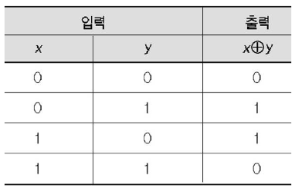

(a) (0.5, 0.5, 0.2)

(b) (0.5, 0.5, 0.7)

(c) (1.0, 1.0, 1.0)

(d) 단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.

정답 : (d)

2.4 다음은 AND, NAND, OR 게이트를 조합해 구현한 XOR 게이트입니다. 세션 발표 내용을 참고하여, XOR 게이트를 파이썬으로 구현해주세요.(7점)

In [27]:
# 논리 회로 게이트 AND, NAND, OR을 정의하는 코드입니다. 실행해주세요.

import numpy as np

#AND 게이트는 2.2 에서 구현한 것 그대로 사용하시면 됩니다.
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.6
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  else:
    return 1
  
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [28]:
# XOR 게이트 함수 생성
def XOR(x1, x2):

  # 출력값 s1, s2를 새로운 입력값으로 받는 2층의 다중 퍼셉트론을 구현합니다.
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [29]:
# 다음을 프린트하여 (0, 1, 1, 0)이 나오면 정답입니다.
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)